In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/Copy of sonar data.csv",header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
data.shape

(208, 61)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
data[60].value_counts()

,count
60,
M,111
R,97


In [ ]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
X = data.drop(columns=60,axis=1)
Y = data[60]

In [ ]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [ ]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X_train)

         0       1       2       3       4       5       6       7       8   \
113  0.0283  0.0599  0.0656  0.0229  0.0839  0.1673  0.1154  0.1098  0.1370   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
116  0.0094  0.0333  0.0306  0.0376  0.1296  0.1795  0.1909  0.1692  0.1870   
171  0.0179  0.0136  0.0408  0.0633  0.0596  0.0808  0.2090  0.3465  0.5276   
64   0.0071  0.0103  0.0135  0.0494  0.0253  0.0806  0.0701  0.0738  0.0117   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
85   0.0365  0.1632  0.1636  0.1421  0.1130  0.1306  0.2112  0.2268  0.2992   
132  0.0968  0.0821  0.0629  0.0608  0.0617  0.1207  0.0944  0.4223  0.5744   
164  0.0163  0.0198  0.0202  0.0386  0.0752  0.1444  0.1487  0.1484  0.2442   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   

         9   ...      50      51      52      53   

In [ ]:
print(Y_train)

113    M
25     R
116    M
171    M
64     R
      ..
85     R
132    M
164    M
19     R
37     R
Name: 60, Length: 187, dtype: object


In [ ]:
print(X_test)

         0       1       2       3       4       5       6       7       8   \
73   0.0139  0.0222  0.0089  0.0108  0.0215  0.0136  0.0659  0.0954  0.0786   
179  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
172  0.0180  0.0444  0.0476  0.0698  0.1615  0.0887  0.0596  0.1071  0.3175   
192  0.0056  0.0267  0.0221  0.0561  0.0936  0.1146  0.0706  0.0996  0.1673   
75   0.0202  0.0104  0.0325  0.0239  0.0807  0.1529  0.1154  0.0608  0.1317   
49   0.0119  0.0582  0.0623  0.0600  0.1397  0.1883  0.1422  0.1447  0.0487   
104  0.0307  0.0523  0.0653  0.0521  0.0611  0.0577  0.0665  0.0664  0.1460   
137  0.0430  0.0902  0.0833  0.0813  0.0165  0.0277  0.0569  0.2057  0.3887   
58   0.0225  0.0019  0.0075  0.0097  0.0445  0.0906  0.0889  0.0655  0.1624   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
119  0.0261  0.0266  0.0223  0.0749  0.1364  0.1513  0.1316  0.1654  0.1864   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124 

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_predict = model.predict(X_train)
accuracy = accuracy_score(Y_train,X_train_predict)
print("The accuracy score is : ",accuracy)

The accuracy score is :  0.8128342245989305


In [ ]:
X_test_predict = model.predict(X_test)
accuracy1 = accuracy_score(Y_test,X_test_predict)
print("The accuracy score is : ",accuracy1)

The accuracy score is :  0.9047619047619048


In [ ]:
input = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
input_array = np.asarray(input)
input_reshape = input_array.reshape(1,-1)
input_prediction = model.predict(input_reshape)
print(input_prediction)

['R']


In [ ]:
if(input_prediction[0] == 'R'):
  print("It is rock")
else:
  print("It is mine")

It is rock


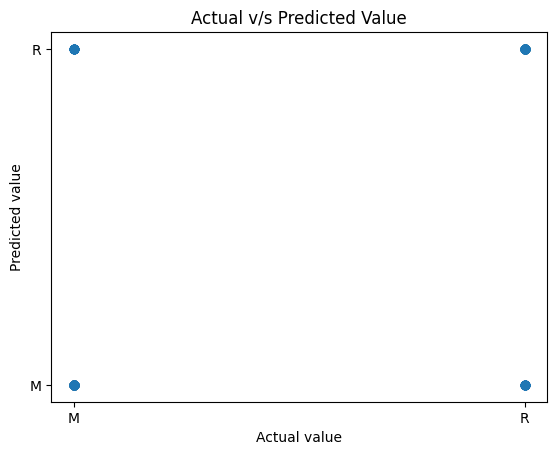

In [ ]:
plt.scatter(Y_train,X_train_predict)
plt.title("Actual v/s Predicted Value")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()